In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Data

Read the train and test csv files from disk. The datasets are also grouped, for later operations.

Preview the data.

In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

full = [train, test]

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data shape and columns

#### Categorical Columns
<ul>
<li> Survived (Nominal)</li>
<li> Sex (Nominal) </li>
<li> Embarked </li>
<li> Pclass (ordinal)</li>
</ul>

#### Numerical Columns
<ul>
<li> Age (Continuous) </li>
<li> Fare (Continuous) </li>
<li> Parch (Discrete) </li>
<li> SibSp (Discrete) </li>
</ul>

#### Other notes

`Ticket` contains alphanumeric and numeric characters. `Cabin` is alphanumeric.

In [6]:
print('Training Data Shape = {}'.format(train.shape))
print('Test Data Shape = {}'.format(test.shape))
print('Columns = {}'.format(list(train.columns)))

Training Data Shape = (891, 12)
Test Data Shape = (418, 11)
Columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


### Dataset type info and missing values

`Age`, `Cabin` and `Embarked` have missing values in the training set

In [7]:
print('\n', '-'*12 , 'Data  Info', '-'*12)
train.info()
print('\n', '-'*7 , 'Missing Value Percentage', '-'*7)
for col in train.columns:
    print(col, str(round(100* train[col].isnull().sum() / len(train), 2)) + '%')


 ------------ Data  Info ------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 ------- Missing Value Percentage -------
PassengerId 0.0%
Survived 0.0%
Pclass 0.0%
Name 0.0%
Sex 0.0%
Age 19.87%
SibSp 0.0%
Parch 0.0%
Ticket 0.0%
Fare 0.0%
Cabin 77.1%
Embarked 0.22%


### Summary statistics of numerical features

Notable remarks from training data: 

<ul>
    <li> Approximately 38% of the passengers survived </li>
    <li> Few old passengers in the boat, with 75% of the passengers below 38 years old </li>
</ul>

In [8]:
train[train.columns.difference(['PassengerId', 'Pclass'])].describe()

,Age,Fare,Parch,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,0.523008,0.383838
std,14.526497,49.693429,0.806057,1.102743,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,8.000000,1.000000


### Summary statistics of categorical features

Notable remarks from training data: 

<ul>
    <li> Most sample passengers were male </li>
    <li> Most sample passengers embarked on Southampton </li>
</ul>

In [9]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Reynaldo, Ms. Encarnacion",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


### Grouped statistiscs

The following section groups categorical features and takes the average of the `Survived` target variable, in order to assess correlcations.

Notable remarks: 

<ul>
    <li> Sex seems to be correlated with survivability </li>
    <li> Most sample survivors embarked at Cherbourg </li>
</ul>

In [83]:
train[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [84]:
train[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [13]:
train[['Fare', 'Survived']].groupby(pd.qcut(train['Fare'], 2)).mean()

,Fare,Survived
Fare,,
"(-0.001, 14.454]",8.713860,0.250559
"(14.454, 512.329]",55.853274,0.518018


## Data visualization

### Age distribution by age

<ul>
    <li> Infants around age 5 had a high survival rate </li>
</ul>


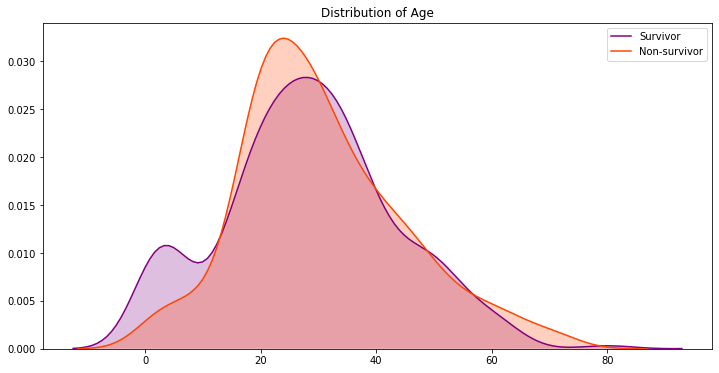

In [133]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Age")

sns.kdeplot(data=train.loc[train.Survived == 1 , 'Age'], label='Survivor', shade=True, color='purple')
sns.kdeplot(data=train.loc[train.Survived == 0 , 'Age'], label='Non-survivor', shade=True, color='orangered')

# Force legend to appear
plt.legend();

/Users/franciscosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


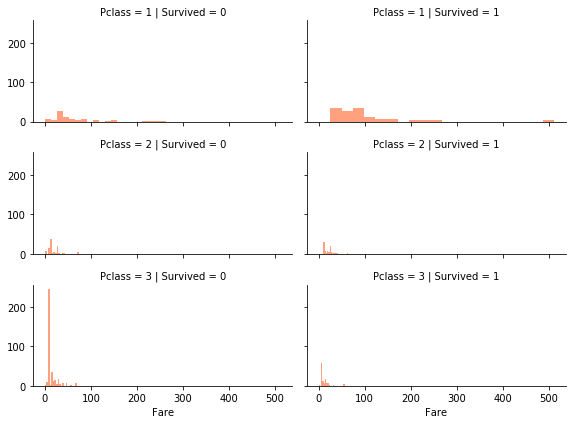

In [10]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2, aspect=2)
grid.map(plt.hist, 'Fare', alpha=.5, bins=20, color='orangered')
grid.add_legend();

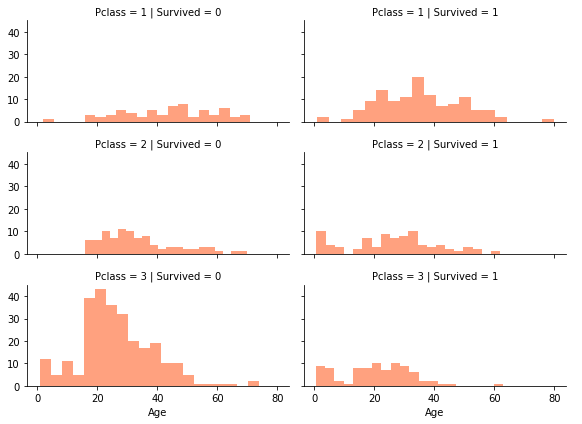

In [129]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2, aspect=2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20, color='orangered')
grid.add_legend();

/Users/franciscosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/franciscosilva/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


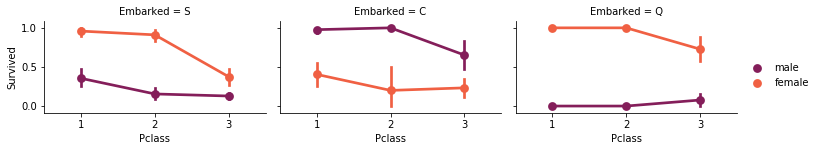

In [131]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train, col='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='rocket')
grid.add_legend();